In [1]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

recipes_dataset = pd.read_csv('/content/drive/MyDrive/recipes_dataset/recettes.csv')

In [4]:
recipes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37281 entries, 0 to 37280
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nom_de_recette        37281 non-null  object 
 1   type_de_recette       37281 non-null  object 
 2   type_du_plat          37281 non-null  object 
 3   ingredients           37277 non-null  object 
 4   ustensiles            36539 non-null  object 
 5   nombre_de_personnes   37261 non-null  float64
 6   difficulte            37281 non-null  object 
 7   budget                37281 non-null  object 
 8   temps_de_preparation  37281 non-null  object 
 9   etapes                37281 non-null  object 
 10  score                 37281 non-null  object 
 11  similaire             37180 non-null  object 
 12  nbre_de_commentaires  37281 non-null  int64  
 13  commentaires          28917 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 4.0+ MB


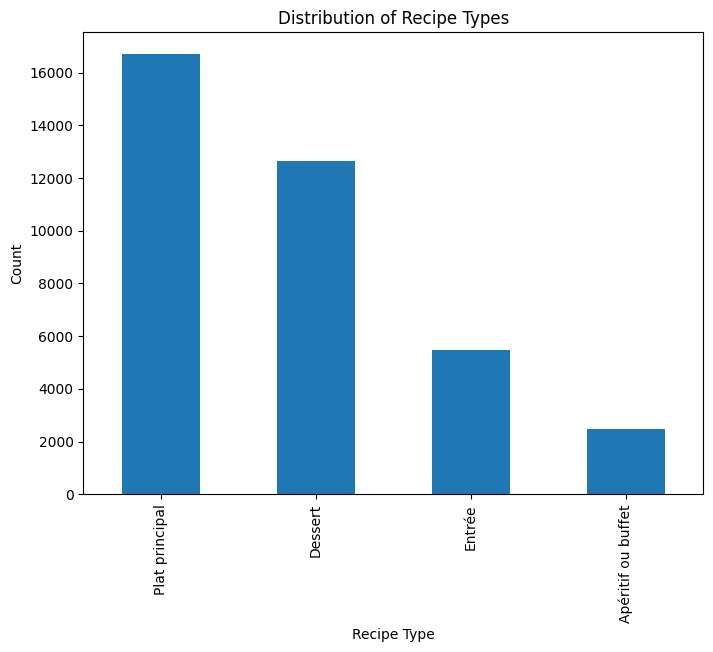

In [5]:
# Visualize the distribution of recipe types
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
recipes_dataset['type_de_recette'].value_counts().plot(kind='bar')
plt.title('Distribution of Recipe Types')
plt.xlabel('Recipe Type')
plt.ylabel('Count')
plt.show()

In [6]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')


# Fonction pour nettoyer le texte
def clean_text(text):
    # Mettre en minuscules
    text = text.lower()

    # Supprimer les accents
    text = ''.join(char for char in unicodedata.normalize('NFD', text) if unicodedata.category(char) != 'Mn')

    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenisation des mots
    tokens = word_tokenize(text)

    # Supprimer les stopwords
    stop_words = set(stopwords.words('french'))  # Vous pouvez changer 'french' par 'english' si vous utilisez l'anglais
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Rejoindre les mots pour former une chaîne
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Appliquer la fonction de nettoyage à la colonne 'noms_ingredients'
recipes_dataset['nom_de_recette'] = recipes_dataset['nom_de_recette'].apply(clean_text)

# Afficher le DataFrame avec la colonne 'noms_ingredients' nettoyée
print(recipes_dataset[['nom_de_recette']])

recipes = list(recipes_dataset['nom_de_recette'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                 nom_de_recette
0                      wrap chevre croustillant
1       aperitif maisoncomme restaurant chinois
2                              verrine dautomne
3                                    chips kale
4                              stgermain spritz
...                                         ...
37276                           punch delicieux
37277  aperol spritz cocktail italien petillant
37278                houmous puree pois chiches
37279                          gougeres fromage
37280                   cake sale jambon olives

[37281 rows x 1 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Fit and transform the 'type_de_recette' column
recipes_dataset['type_de_recette_encoded'] = label_encoder.fit_transform(recipes_dataset['type_de_recette'])

# Print the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

# Print the DataFrame with the encoded column
print("Encoded DataFrame:")
print(recipes_dataset[['type_de_recette', 'type_de_recette_encoded']])

labels = list(recipes_dataset['type_de_recette_encoded'])


Label Mapping:
{'Apéritif ou buffet': 0, 'Dessert': 1, 'Entrée': 2, 'Plat principal': 3}
Encoded DataFrame:
          type_de_recette  type_de_recette_encoded
0      Apéritif ou buffet                        0
1      Apéritif ou buffet                        0
2      Apéritif ou buffet                        0
3      Apéritif ou buffet                        0
4      Apéritif ou buffet                        0
...                   ...                      ...
37276  Apéritif ou buffet                        0
37277  Apéritif ou buffet                        0
37278  Apéritif ou buffet                        0
37279  Apéritif ou buffet                        0
37280  Apéritif ou buffet                        0

[37281 rows x 2 columns]


In [8]:
print(recipes)
print(labels)

['wrap chevre croustillant', 'aperitif maisoncomme restaurant chinois', 'verrine dautomne', 'chips kale', 'stgermain spritz', 'oeufs poches fondue poireaux', 'wok poulet curry thym', 'rillettes chorizo', 'verrine tricolore jambon', 'oeufs poches jambon bayonne', 'creme dasperges verrines', 'yassa poulet moutarde', 'rillettes saumon', 'wok coquillettes crevettes', 'veloute tagliatelles', 'pate cake sale', 'oeufs poches a poire chevre', 'oeufs poches a fondue legumes', 'cotes porc pommes terre cocotte', 'hoummous libanais', 'omelette brouillee saumon a creme fraiche', 'oeufs durs farcis crevettes', 'wok poulet courgettes vermicelles riz citron vert a menthe', 'omelette bolognaise', 'cotes porc champvallon', 'oeufs poches a bechamel rose', 'americano', 'omelette girolles ble asperges aubergines', 'omelette noix', 'omelette graines germees', 'omelette clementines', 'omelette rognons veau', 'omelette girolles foie volaille', 'omelette aubergines a feta', 'omelette sarrasin', 'omelette gigot

In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertModel, BertConfig, AdamW

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=4)
model = BertModel.from_pretrained('bert-base-uncased', config=config)

# Dataset
recipes = recipes
labels = labels

# Tokenize and encode the text data
tokenized_inputs = tokenizer(recipes, padding=True, truncation=True, return_tensors='pt')

# Create PyTorch Dataset
dataset = TensorDataset(tokenized_inputs['input_ids'], tokenized_inputs['attention_mask'], torch.tensor(labels))

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define a simple classification head
class SimpleClassifier(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc = torch.nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = self.fc(x)
        return x




tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [11]:
# Create the classifier
classifier = SimpleClassifier(config.hidden_size, config.num_labels)

# Training
optimizer = AdamW(classifier.parameters(), lr=0.01)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier.to(device)
model.to(device)

for epoch in range(30):
    classifier.train()
    for batch in train_dataloader:
        input_ids, attention_mask, label = batch
        input_ids, attention_mask, label = input_ids.to(device), attention_mask.to(device), label.to(device)

        # Obtain BERT embeddings
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        # Use [CLS] token embedding as input to the classifier
        cls_embedding = outputs.last_hidden_state[:, 0, :]

        # Forward pass through the classifier
        logits = classifier(cls_embedding)

        # Calculate loss and backpropagate
        loss = torch.nn.functional.cross_entropy(logits, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    classifier.eval()
    with torch.no_grad():
        val_loss = 0.0
        total_samples = 0
        correct_predictions = 0

        for batch in val_dataloader:
            input_ids, attention_mask, label = batch
            input_ids, attention_mask, label = input_ids.to(device), attention_mask.to(device), label.to(device)

            # Obtain BERT embeddings
            outputs = model(input_ids, attention_mask=attention_mask)

            # Use [CLS] token embedding as input to the classifier
            cls_embedding = outputs.last_hidden_state[:, 0, :]

            # Forward pass through the classifier
            logits = classifier(cls_embedding)

            # Calculate loss
            val_loss += torch.nn.functional.cross_entropy(logits, label).item()

            # Calculate accuracy
            _, predicted_labels = torch.max(logits, 1)
            total_samples += label.size(0)
            correct_predictions += (predicted_labels == label).sum().item()

        avg_val_loss = val_loss / len(val_dataloader)
        accuracy = correct_predictions / total_samples
        print(f'Epoch {epoch + 1}/{30}, Loss: {avg_val_loss}, Accuracy: {accuracy}')

# Save the fine-tuned classifier
torch.save(classifier.state_dict(), '/content/drive/MyDrive/recipes_dataset/final_checkpoints.pth')

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/30, Loss: 0.7111303973146993, Accuracy: 0.7354163872871128
Epoch 2/30, Loss: 0.6973629054478091, Accuracy: 0.7453399490411694
Epoch 3/30, Loss: 0.7135266140740142, Accuracy: 0.7433284162531849
Epoch 4/30, Loss: 0.8295563007585514, Accuracy: 0.7240177014885343
Epoch 5/30, Loss: 0.6594705874593849, Accuracy: 0.7631755397612981
Epoch 6/30, Loss: 0.6616454116172261, Accuracy: 0.76465066380582
Epoch 7/30, Loss: 0.6773403516819334, Accuracy: 0.750167627732332
Epoch 8/30, Loss: 0.7041282769706514, Accuracy: 0.7406463725358723
Epoch 9/30, Loss: 0.7767047957859488, Accuracy: 0.7182513074963122
Epoch 10/30, Loss: 0.6327496071974946, Accuracy: 0.7768539627195923
Epoch 11/30, Loss: 0.6313094158585255, Accuracy: 0.7751106343033392
Epoch 12/30, Loss: 0.673018243131984, Accuracy: 0.7576773501408073
Epoch 13/30, Loss: 0.6764682720486934, Accuracy: 0.7705511599839078
Epoch 14/30, Loss: 0.6933466234905088, Accuracy: 0.7541906933083009
Epoch 15/30, Loss: 0.6752700274571394, Accuracy: 0.7570068392

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Load the fine-tuned classifier
loaded_classifier = SimpleClassifier(config.hidden_size, config.num_labels)
loaded_classifier.load_state_dict(torch.load('/content/drive/MyDrive/recipes_dataset/final_checkpoints.pth'))
loaded_classifier.to(device)
loaded_classifier.eval()

# Tokenize and encode new recipe names
new_recipe_texts = ["gateau au chocolat", "salade cesar", 'couscous au poulet', 'gratin fruits de mer', 'cocktail ananas',"gateau", "salade cesar", "pancake miel", 'cocktail citron ananas', 'ratatouilles', 'pancake bananes', 'verrines de legumes', "chaussons sales d'ete", 'rillette chaude de maquereau', 'mini bouchees aux anchois', 'verrine facon tartiflette', 'mille feuilles', 'couscous', 'pizza', 'spaghetti fruits mer', 'soupe', 'crevettes sautees']

tokenized_new_recipes = tokenizer(new_recipe_texts, padding=True, truncation=True, return_tensors='pt')
tokenized_new_recipes = {key: value.to(device) for key, value in tokenized_new_recipes.items()}

# Forward pass through the loaded classifier
with torch.no_grad():
    new_recipe_outputs = model(**tokenized_new_recipes)
    new_recipe_cls_embedding = new_recipe_outputs.last_hidden_state[:, 0, :]
    new_recipe_logits = loaded_classifier(new_recipe_cls_embedding)

# Convert logits to probabilities
probabilities = torch.nn.functional.softmax(new_recipe_logits, dim=1)

# Get predicted labels
_, predicted_labels = torch.max(new_recipe_logits, 1)

# Invert label encoding using LabelEncoder's inverse_transform method
predicted_labels_original = label_encoder.inverse_transform(predicted_labels.cpu().numpy())

# Display results
for recipe, label, prob in zip(new_recipe_texts, predicted_labels_original, probabilities.cpu().numpy()):
    print(f"Recipe: {recipe}, Predicted Label: {label}, Probability: {prob}")

 # {'Apéritif ou buffet': 0, 'Dessert': 1, 'Entrée': 2, 'Plat principal': 3}


Recipe: gateau au chocolat, Predicted Label: Dessert, Probability: [6.1867438e-04 9.9380505e-01 2.8646938e-04 5.2898577e-03]
Recipe: salade cesar, Predicted Label: Plat principal, Probability: [0.04063728 0.00167223 0.20432033 0.75337017]
Recipe: couscous au poulet, Predicted Label: Plat principal, Probability: [0.13385344 0.04899131 0.01419106 0.80296415]
Recipe: gratin fruits de mer, Predicted Label: Plat principal, Probability: [3.8772693e-03 1.6541007e-01 3.7479066e-04 8.3033788e-01]
Recipe: cocktail ananas, Predicted Label: Apéritif ou buffet, Probability: [7.4061024e-01 2.5308779e-01 5.7943716e-06 6.2961229e-03]
Recipe: gateau, Predicted Label: Dessert, Probability: [5.0148828e-04 9.9592763e-01 3.5238813e-04 3.2185179e-03]
Recipe: salade cesar, Predicted Label: Plat principal, Probability: [0.04063728 0.00167223 0.20432033 0.75337017]
Recipe: pancake miel, Predicted Label: Dessert, Probability: [0.02489049 0.8500811  0.00314574 0.1218826 ]
Recipe: cocktail citron ananas, Predicte